In [34]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
test_obj = np.load("./Testdata/test_brand1.npy",allow_pickle=True).item()
train_obj = np.load("./Traindata/train_brand1_dict.npy",allow_pickle=True).item()
test_label_obj = np.load(f"../AUROCscore/labels/brand1/labels.npy",allow_pickle=True).item()
train_label_obj = np.load(f"../AUROCscore/labels/brand1/train_labels.npy",allow_pickle=True).item()
col_obj = torch.load("column.pkl")
test_scores = np.load(f"../AUROCscore/scores/brand1/tranad_epoch5_lr1e-3/test_scores.npy",allow_pickle=True).item()
train_scores = np.load(f"../AUROCscore/scores/brand1/tranad_epoch5_lr1e-3/train_scores.npy",allow_pickle=True).item()


In [210]:
all_obj = {}
train_obj.update(test_obj)
all_obj.update(train_obj)
all_score = {}
train_scores.update(test_scores)
all_score.update(train_scores)
all_label = {}
train_label_obj.update(test_label_obj)
all_label.update(train_label_obj)

Total_FN_car = [171,184,105,21,196,119]

normal_score = {}
abnormal_score = {}
for k,v in all_label.items():
    if v==0 :
        s = np.asarray(all_score[k]).reshape(-1)
        score = np.sort(s)[-3:].mean()
        normal_score[k] = float(score)
    elif v==1:
        s = np.asarray(all_score[k]).reshape(-1)
        score = np.sort(s)[-3:].mean()
        abnormal_score[k] = float(score)

sorted_normal_score = sorted(normal_score.items(),key=lambda x:x[1],reverse=True)
sorted_abnormal_score = sorted(abnormal_score.items(),key=lambda x:x[1],reverse=True)
print(sorted_normal_score)
print(sorted_abnormal_score)

print("")
FN_car = sorted_abnormal_score[-6:]
FN_car.sort(key=lambda x:x[1],reverse=False)
print(FN_car)
TP_car = sorted_abnormal_score[:6]
print(TP_car)
normal_hierror_car = sorted_normal_score[:6]
print(normal_hierror_car)
normal_lowerror_car = sorted_normal_score[-6:]
normal_lowerror_car.sort(key=lambda x:x[1],reverse=False)
print(normal_lowerror_car)


[(138, 0.00859872717410326), (35, 0.005442765541374683), (83, 0.0037321814646323523), (131, 0.0027376048577328524), (14, 0.0025604195737590394), (44, 0.002440068870782852), (67, 0.002250769641250372), (128, 0.0021372640815873942), (179, 0.0020942973981921873), (127, 0.002081417517426113), (17, 0.002072041970677674), (160, 0.0017643771522367995), (144, 0.0016822058823890984), (82, 0.0016250552143901587), (112, 0.0013665732694789767), (141, 0.0012333807147418459), (30, 0.0012327626269931595), (195, 0.0012238149841626484), (64, 0.0012054265631983678), (52, 0.0011978967813774943), (53, 0.001195294860129555), (113, 0.0011778419138863683), (85, 0.001173415648130079), (132, 0.001169599941931665), (80, 0.0011232988520835836), (165, 0.0011060416388014953), (145, 0.001092122809495777), (173, 0.0010608548764139414), (147, 0.0010421913854467373), (66, 0.00103928967534254), (54, 0.0010195552798298497), (19, 0.001000173157081008), (110, 0.0009948953714532156), (180, 0.0009905073093250394), (146, 0.0

In [211]:
fn_cid = FN_car[0][0]
tp_cid = TP_car[0][0]
normal_hi_cid = normal_hierror_car[0][0]
normal_lo_cid = normal_lowerror_car[0][0]

print(f"FN car id = {fn_cid}")
print(f"TP car id = {tp_cid}")
print(f"Normal high error car id = {normal_hi_cid}")
print(f"Normal low error car id = {normal_lo_cid}")

FN car id = 171
TP car id = 107
Normal high error car id = 138
Normal low error car id = 33


In [212]:

fn_top_idx = np.argsort(all_score[fn_cid])[-3:]
print(fn_top_idx)
for i in range(3):
    print(f"{fn_top_idx[-i-1]} : {all_score[fn_cid][fn_top_idx[-i-1]]}")
tp_top_idx = np.argsort(all_score[tp_cid])[-3:]
print(tp_top_idx)
for i in range(3):
    print(f"{tp_top_idx[-i-1]} : {all_score[tp_cid][tp_top_idx[-i-1]]}")
# normal car도 함께 플롯할 예정

norm_top_idx = np.argsort(all_score[normal_hi_cid])[-3:]
print(norm_top_idx)
for i in range(3):
    print(f"{norm_top_idx[-i-1]} : {all_score[normal_hi_cid][norm_top_idx[-i-1]]}")

norm_low_idx = np.argsort(all_score[normal_lo_cid])[-3:]
print(norm_low_idx)
for i in range(3):
    print(f"{norm_low_idx[-i-1]} : {all_score[normal_lo_cid][norm_low_idx[-i-1]]}")

[37 68 33]
33 : 0.000540667911991477
68 : 0.00041267991764470935
37 : 0.0003666382981464267
[ 87  22 124]
124 : 0.028066273778676987
22 : 0.013554800301790237
87 : 0.01248498260974884
[4097 1100 4137]
4137 : 0.014529171399772167
1100 : 0.0075493562035262585
4097 : 0.0037176539190113544
[ 6 21 10]
10 : 0.0003984537615906447
21 : 0.00037008296931162477
6 : 0.0003687324351631105


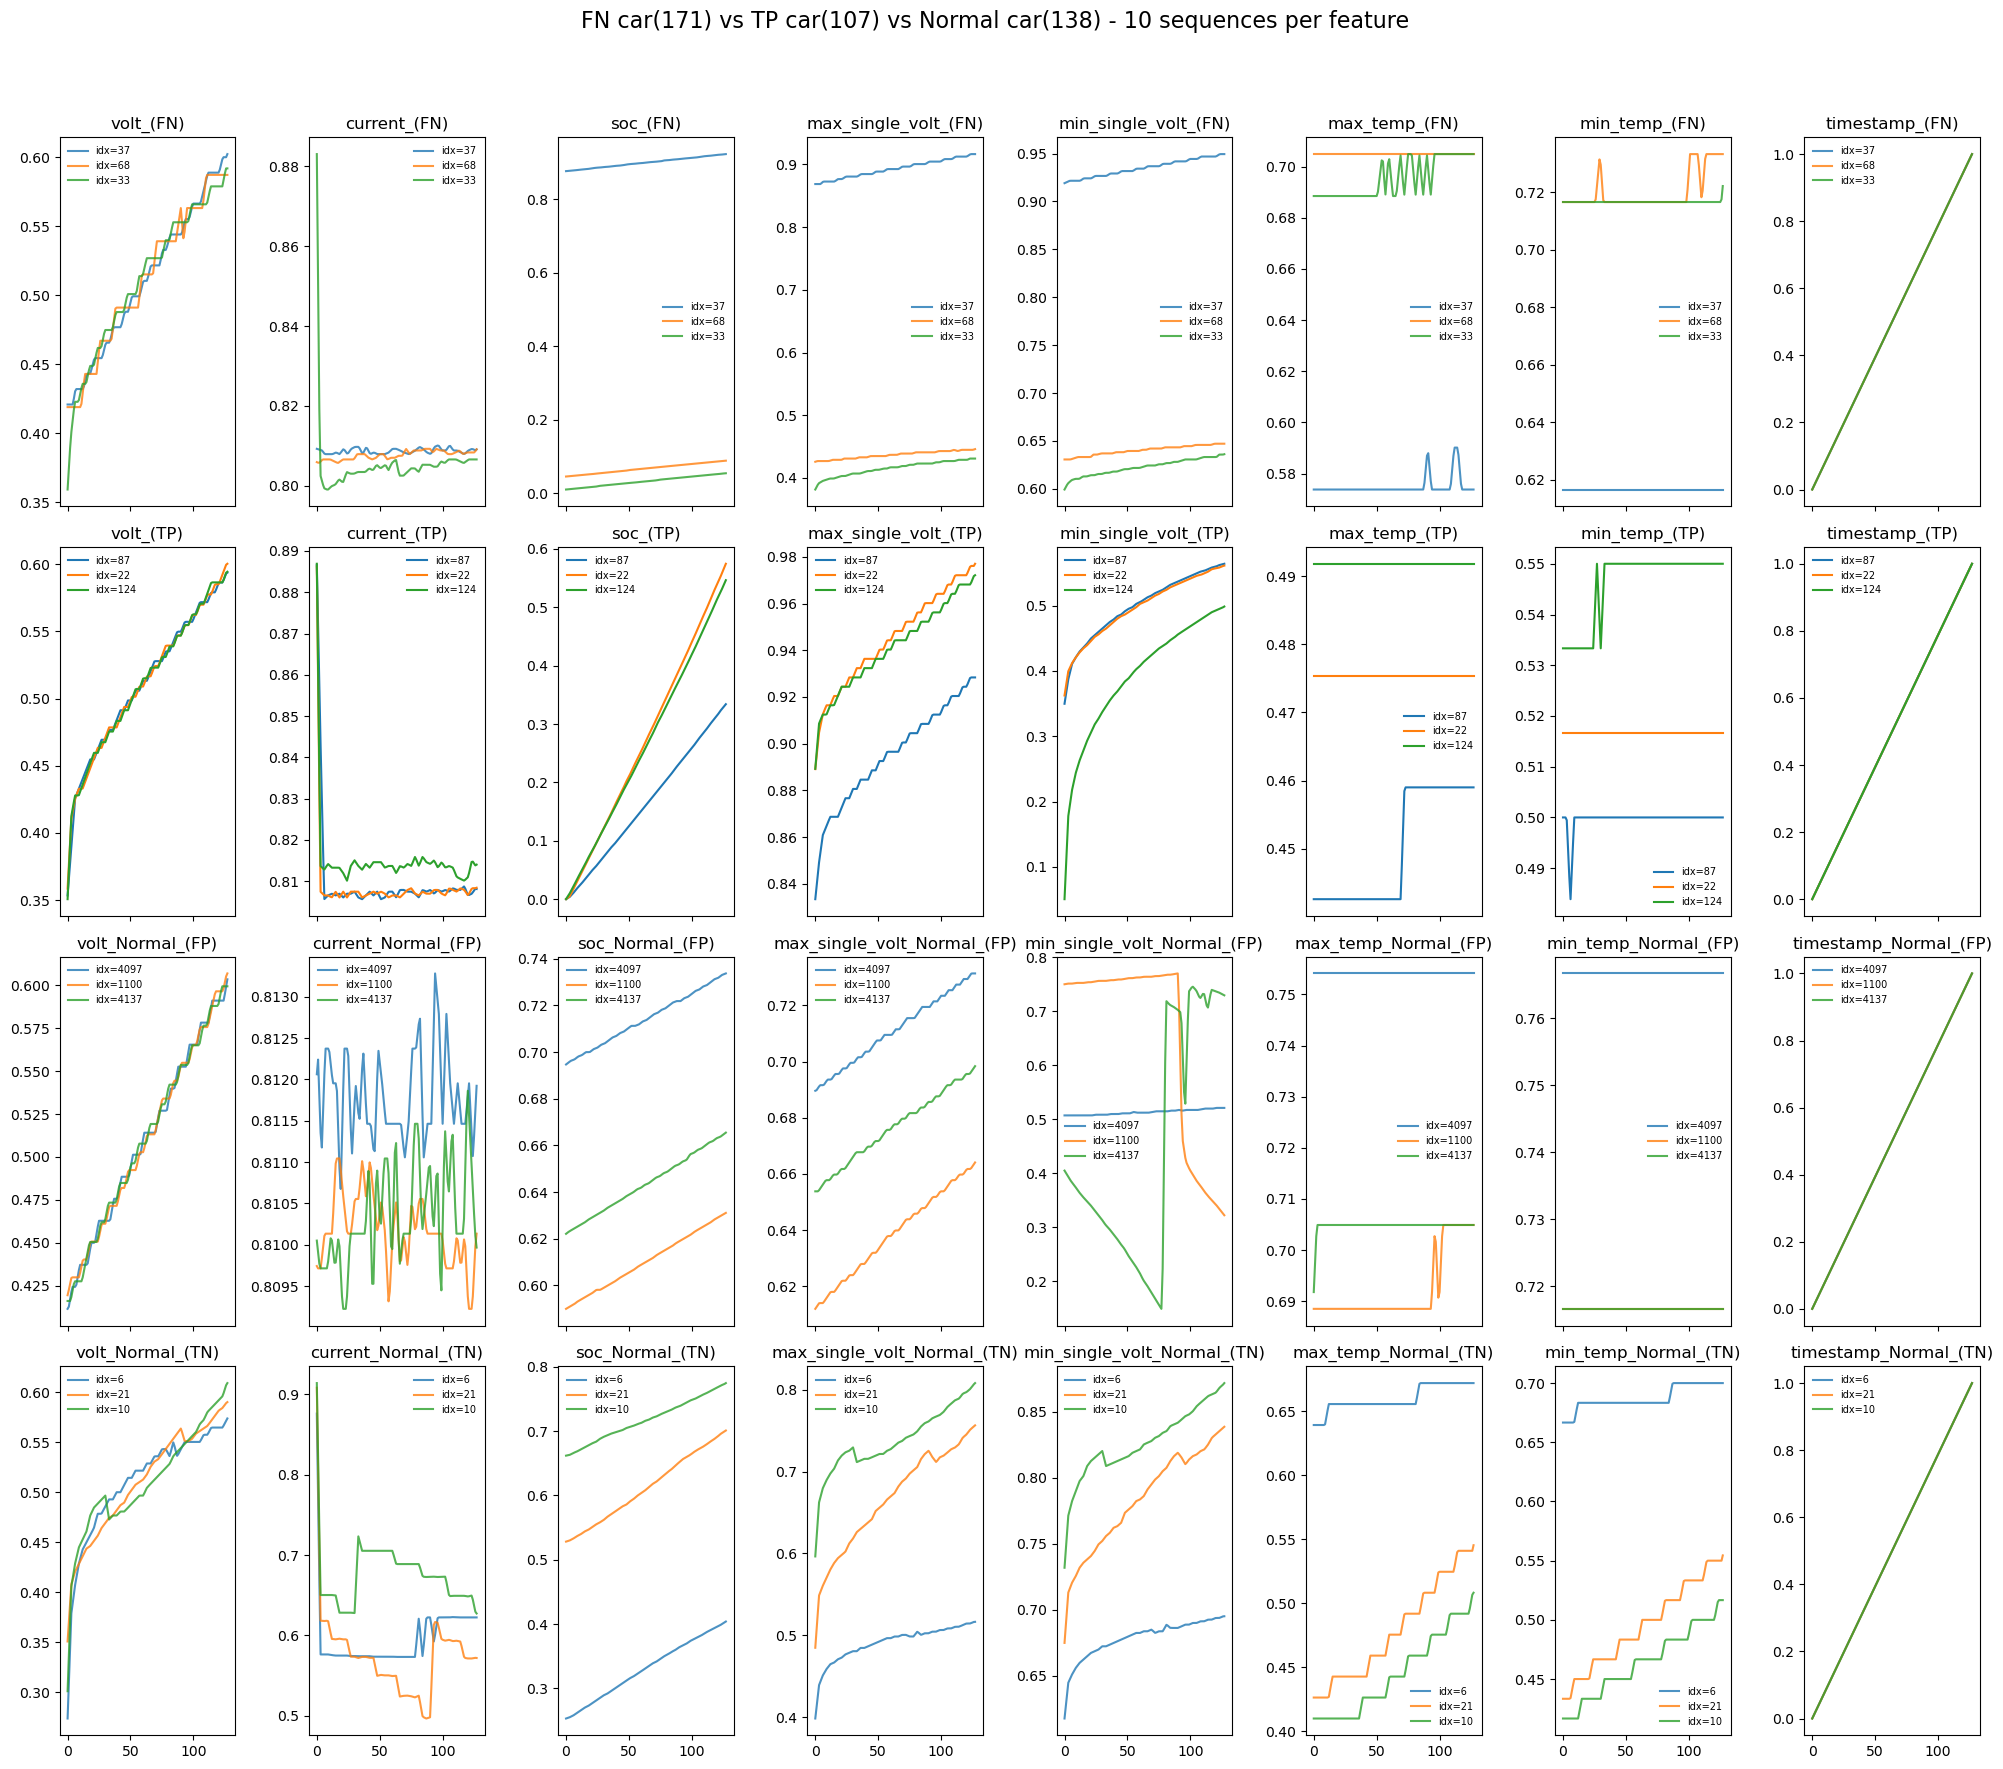

In [217]:
col = len(col_obj)
fig,axes = plt.subplots(
    nrows=4,
    ncols=col,
    figsize = (20,18),
    sharex=True,
)
fig.suptitle(f"FN car({fn_cid}) vs TP car({tp_cid}) vs Normal car({normal_hi_cid}) - 10 sequences per feature", fontsize=16)
for i in range(col):
    for n in fn_top_idx:
        axes[0,i].plot(all_obj[fn_cid][n,:,i],label=f"idx={n}",alpha=0.8)
        axes[0,i].set_title(f"{col_obj[i]}_(FN)")
        axes[0, i].legend(fontsize=7, frameon=False) 
    for n in tp_top_idx:
        axes[1,i].plot(all_obj[tp_cid][n,:,i],label=f"idx={n}")
        axes[1,i].set_title(f"{col_obj[i]}_(TP)")
        axes[1, i].legend(fontsize=7, frameon=False)
    for n in norm_top_idx:
        axes[2,i].plot(all_obj[normal_hi_cid][n,:,i],label=f"idx={n}",alpha=0.8)
        axes[2,i].set_title(f"{col_obj[i]}_Normal_(FP)")
        axes[2,i].legend(fontsize=7, frameon=False) 
    for n in norm_low_idx:
        axes[3,i].plot(all_obj[normal_lo_cid][n,:,i],label=f"idx={n}",alpha=0.8)
        axes[3,i].set_title(f"{col_obj[i]}_Normal_(TN)")
        axes[3,i].legend(fontsize=7, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # suptitle 공간 확보
plt.show()

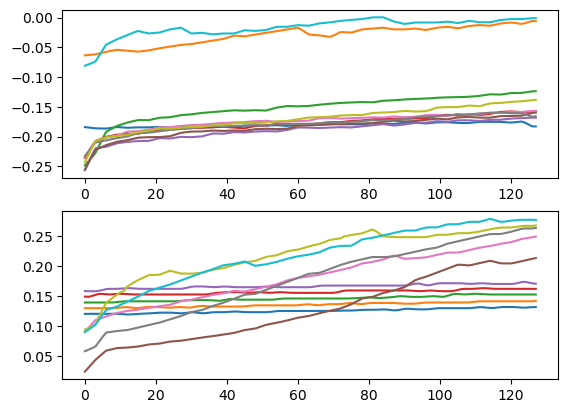

In [97]:
plt.subplot(211)
for i in fn_top_idx:
    fn_dV = test_obj[fn_cid][i,:,3] - test_obj[fn_cid][i,:,4]
    plt.plot(fn_dV)
plt.subplot(212)
for i in tp_top_idx:
    tp_dV = test_obj[tp_cid][i,:,3] - test_obj[tp_cid][i,:,4]
    plt.plot(tp_dV)